In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.rcParams.update({'font.size': 16})
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import pickle
import os
import csv
from scipy import stats
from itertools import groupby 
from scipy.ndimage.filters import gaussian_filter

In [2]:
bands = ['dp','thp','ap','bp','gp','hgp']

labels=['unlabeled', 'labeled']
sub_ses = [['SD010','01'],
           ['SD011','01'],
           ['SD012','02'],
           ['SD013','01'],
           ['SD015','01'],
           ['SD017','01'],
           ['SD018','01'],
           ['SD019','01'],
           ['SD021','01'],
           ['SD022','01']]

In [3]:
with open('Figure7-8b/mne_shuffled_r_data_dic.pkl','rb') as f:
    shuf_dic = pickle.load(f)

In [4]:
with open('Figure7-8b/mne_cat_eng_data.csv','rb') as f:
    cat_df = pd.read_csv(f)

In [5]:
with open('Figure7-8b/small_sub-SD010_MNE_correlation_dic.pkl', 'rb') as handle:
    corrdic = pickle.load(handle)

In [6]:
with open('Figure7-8b/figure7a_phone-times.pkl','rb') as f:
    exl = pickle.load(f)
    
with open('Figure7-8b/figure7b_phone-times.pkl','rb') as f:
    sess_labels = pickle.load(f)

In [7]:
cat_df['r'] = np.square(cat_df['r'])

In [8]:
def window_std(array, win_len):
    new_array = np.zeros(len(array))
    for i in range(len(array)):
        new_array[i] = np.std(array[i:i+win_len])
    return new_array

### Figure 7 a&b

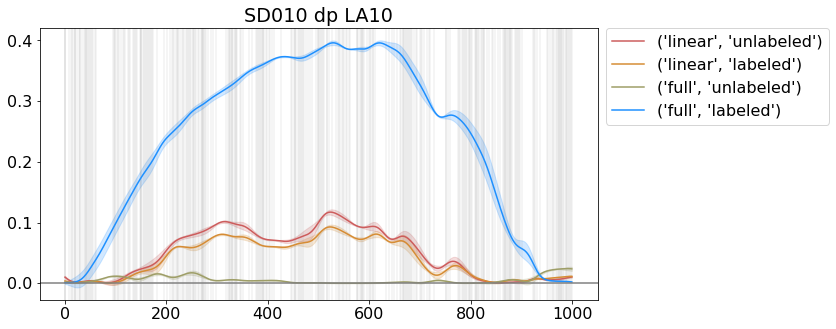

['nan', 'VOCNOISE', 'ah', 'nan', 'ah', 'nan', 'ah', 'nan', 'VOCNOISE', 'nan', 'ah', 'nan', 'SIL', 'nan', 'ih', 'nan', 'dx_t', 'ah', 'nan', 'th', 'nan', 'VOCNOISE', 'nan', 't', 'k', 'nan', 'ih', 'nan', 'en', 'n', 'ey', 'nan', 'en', 'nan', 'en', 'nan', 'ah', 'nan', 'ih', 'nan', 'b', 'uw', 'nan', 't', 'nan', 'ih', 't', 'nan', 'el', 'VOCNOISE', 'nx', 'nan', 'uw', 'nan', 'nx', 'nan', 'dh', 'nan', 'VOCNOISE', 'nan', 'eh', 'nan', 'nx', 'nan', 'tq', 'nan', 'zh', 'nan', 'd', 'ch', 'ah', 'nan', 'n', 'jh', 'er', 'jh', 'er', 'nan', 'el', 'nan', 'VOCNOISE', 'nan', 'own', 'nan', 'nx', 'nan', 'VOCNOISE', 'nan', 'tq', 'nan', 'ah', 'nan', 'r', 'nan', 'nx', 'nan', 'VOCNOISE', 'ah', 'nan', 'VOCNOISE', 'nan', 'uh', 'nan', 'ch', 'nan', 'ihn', 'nan', 't', 'uw', 'nan', 'VOCNOISE', 'nan', 'VOCNOISE', 'nan', 'ih', 'nan', 'VOCNOISE', 'nan', 'th', 'nan', 'tq', 'nan'] 122


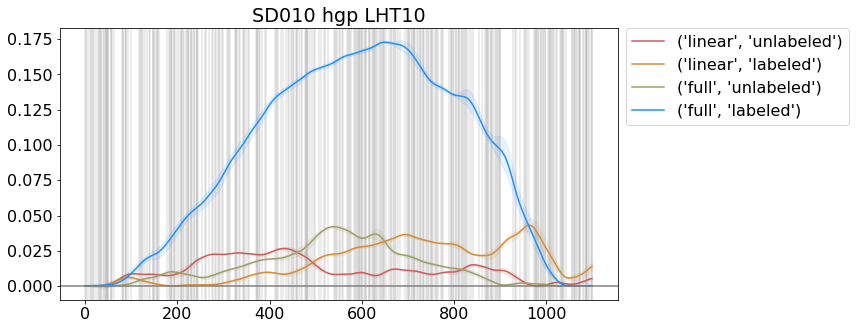

['th', 'ih', 'ng', 'k', 'VOCNOISE', 'l', 'ey', 'dx_t', 'er', 'aa', 'n', 'w', 'ah', 'n', 'iy', 'g', 'ih', 't', 's', 'ah', 'l', 'ah', 'dx_t', 'ah', 'ow', 'l', 'd', 'er', 'VOCNOISE', 'hh', 'iy', 'w', 'uh', 'l', 'b', 'iy', 'VOCNOISE', 'm', 'y', 'ih', 'n', 'ow', 'hh', 'ey', 'SIL', 'k', 'uw', 'l', 'IVER', 'y', 'ih', 'nx', 'ah', 'VOCNOISE', 'w', 'eh', 'n', 'hh', 'iy', 'k', 'eh', 'n', 'r', 'eh', 's', 'ah', 'l', 'w', 'ih', 'hh', 'ih', 'm', 'ah', 'n', 'ao', 'l', 'dh', 'ae', 'tq', 'r', 'ey', 'tq', 'n', 'aw', 'iy', 'sh', 'ah', 's', 'VOCNOISE', 'hh', 'iy', 's', 'ih', 't', 's', 'dh', 'eh', 'r', 'eh', 'n', 'VOCNOISE', 'w', 'nx', 'iy', 'k', 'r', 'ay', 'z', 'iy', 'g', 'ow', 'z', 'VOCNOISE', 'w', 'dx_d', 'ih', 'z', 'iy', 'w', 'aan', 'tq', 'VOCNOISE', 'l', 'ay', 'k', 'ay', 'n', 'ow', 'g', 'dx_d', 'ow', 'n', 'ah', 'l', 'ih', 's', 't', 'hh', 'ah', 'n', 'ch', 'ey', 'n', 'jh', 'ih', 'z', 'd', 'ay', 'p', 'er', 'g', 'ih', 'f', 'hh', 'iy', 'VOCNOISE', 'hh', 'ae', 'ih', 't', 's', 'b', 'ih', 'n', 'SIL', 'th', 'r'

In [9]:
## The location of the correlation dictionary
sub, ses, neu = 'SD010', '01', 'dp'

colors2 = ['indianred','goldenrod','dodgerblue']
anchors = [0.0,0.5, 1.0]
cmap3 = LinearSegmentedColormap.from_list("mycmap2", list(zip(anchors, colors2)))
colors = [cmap3(0.0), cmap3(0.33),cmap3(0.66), cmap3(1.0)]

mods = [('linear','unlabeled'),('linear','labeled'),('full','unlabeled'),('full','labeled')]
sub = "SD010"
ch = "LA10"
neu = 'dp'
t1a, t2a = 1450, 2450

fig,ax = plt.subplots(1,1,figsize=(10,5))
res = [(i[0],len([x for x in i[1]])) for i in groupby(sess_labels[t1a:t2a])]
for x in range(len(res)-1):
    res[x+1] = (res[x+1][0], res[x][1]+res[x+1][1])
ax.axvline(0, c='grey', alpha=0.2)
for x in exl:
    ax.axvline(np.floor(x*37.897381999584866)-exl[0]*37.897381999584866, c='grey', alpha=0.1)
for k,col in zip(mods, colors):
    preline = np.square(corrdic[neu][k[0]][k[1]][ch])
    if len(preline)>800:
        line = gaussian_filter(preline, sigma=12)[:-1000]
        se = window_std(line, 35)[:]
        ax.plot(line[t1a:t2a], c=col, label=k)
        ax.fill_between(range(len(line[t1a:t2a])), line[t1a:t2a]-se[t1a:t2a], line[t1a:t2a]+se[t1a:t2a], color=col, alpha=0.2)
ax.axhline(0, c='grey')
ax.set_title("%s %s %s"%(sub, neu, ch))
ax.legend(loc='upper left', bbox_to_anchor=(1, 1.03))
plt.show()
print([x[0] for x in res], len(res))

ch = 'LHT10'
neu = 'hgp'
t1b, t2b = 9100, 10200
fig,ax = plt.subplots(1,1,figsize=(10,5))
res = [(i[0],len([x for x in i[1]])) for i in groupby(sess_labels[t1b:t2b])]
for x in range(len(res)-1):
    res[x+1] = (res[x+1][0], res[x][1]+res[x+1][1])
ax.axvline(0, c='grey', alpha=0.2)
for x in res:
    ax.axvline(x[1], c='grey', alpha=0.2)
for k,col in zip(mods, colors):
    preline = np.square(corrdic[neu][k[0]][k[1]][ch])
    if len(preline)>800:
        line = gaussian_filter(preline, sigma=12)[:-1000]
        se = window_std(line, 35)[:]
        ax.plot(line[t1b:t2b], c=col, label=k)
        ax.fill_between(range(len(line[t1b:t2b])), line[t1b:t2b]-se[t1b:t2b], line[t1b:t2b]+se[t1b:t2b], color=col, alpha=0.1)
ax.axhline(0, c='grey')
ax.set_title("%s %s %s"%(sub, neu, ch))
ax.legend(loc='upper left', bbox_to_anchor=(1, 1.03))
plt.show()
print([x[0] for x in res], len(res))

### Figure 7c

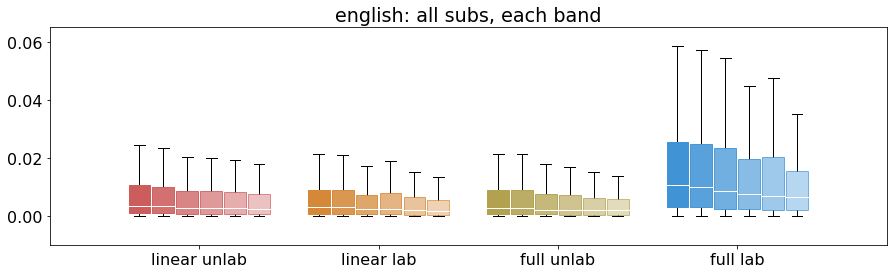

In [10]:
colors2 = ['indianred','goldenrod','dodgerblue','indigo']
anchors = [0.0,0.33, 0.66, 1.0]
cmap3 = LinearSegmentedColormap.from_list("mycmap2", list(zip(anchors, colors2)))
colors = [cmap3(0.0), cmap3(0.2), cmap3(0.4),cmap3(0.6)]

width = 0.8
all_real_values=[]
fig, ax = plt.subplots(1,1, figsize=(15,4))
for i,neu in enumerate(bands):
    for j, mod in enumerate(['linear','full']):
        for k, lab in enumerate(['unlabeled','labeled']):
            all_ch_values = (cat_df[(cat_df['band']==neu) & (cat_df['lang']=='eng') & (cat_df['mod']==mod) & (cat_df['lab']==lab)]['r'])
            parts = ax.boxplot(positions=[(2*j+k-(2.5-i)*width/6)], x=all_ch_values,widths=width/6.6, showfliers=False, patch_artist=True)
            for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
                plt.setp(parts[item], color='black')
                if item == 'boxes': plt.setp(parts[item], color=colors[2*j+k][:3]+((15-i)/15,))
                if item == 'medians': plt.setp(parts[item], color='white')
            plt.setp(parts["boxes"], facecolor=colors[2*j+k][:3]+((8-i)/8,))
            for v in all_ch_values:
                all_real_values.append(v)
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(['linear unlab','linear lab','full unlab','full lab'])
ax.set_title("english: all subs, each band")
ax.set_ylim([-.01,0.065])
plt.show()

### Figure 7d

In [11]:
all_shuf_values = np.square([shuf_dic[sub][neu][lab][ch][mod].real
                             for sub in shuf_dic.keys()
                             for neu in shuf_dic[sub].keys()
                             for lab in shuf_dic[sub][neu].keys()
                             for ch in shuf_dic[sub][neu][lab].keys() if ch in cat_df[(cat_df['sub']==sub)]['ch'].unique()
                             for mod in shuf_dic[sub][neu][lab][ch].keys()])

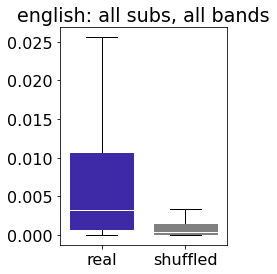

In [12]:
fig, ax = plt.subplots(1,1, figsize=(3,4))

parts = ax.boxplot(positions=[0], x=all_real_values, widths=0.75, showfliers=False, patch_artist=True)
for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
    plt.setp(parts[item], color='black')
    if item == 'boxes': plt.setp(parts[item], color=cmap3(0.9))
    if item == 'medians': plt.setp(parts[item], color='white')
plt.setp(parts["boxes"], facecolor=cmap3(0.9))
ax.hlines(y=np.mean(all_real_values), xmin=-0.5, xmax=0.5, color='white')
ax.vlines(x=0, ymin=np.mean(all_real_values)-stats.sem(all_real_values), ymax=np.mean(all_real_values)+stats.sem(all_real_values), color='white')

parts = ax.boxplot(positions=[1], x=all_shuf_values, widths=0.75, showfliers=False, patch_artist=True)
for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
    plt.setp(parts[item], color='black')
    if item == 'boxes': plt.setp(parts[item], color='grey')
    if item == 'medians': plt.setp(parts[item], color='white')
plt.setp(parts["boxes"], facecolor='grey')
ax.hlines(y=np.mean(all_shuf_values), xmin=.5, xmax=1.5, color='white')
ax.vlines(x=1, ymin=np.mean(all_shuf_values)-stats.sem(all_shuf_values), ymax=np.mean(all_shuf_values)+stats.sem(all_shuf_values), color='white')

ax.set_xticks([0,1])
ax.set_xticklabels(['real','shuffled'])
ax.set_title("english: all subs, all bands")
plt.show()

### Figure 8b

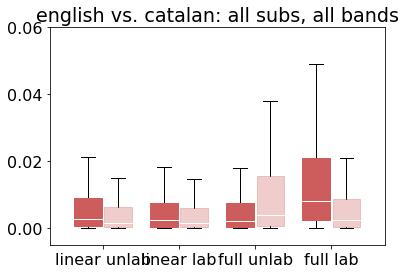

In [13]:
colors2 = ['indianred','goldenrod','dodgerblue','indigo']
anchors = [0.0,0.33, 0.66, 1.0]
cmap3 = LinearSegmentedColormap.from_list("mycmap2", list(zip(anchors, colors2)))
colors = [cmap3(0.0), cmap3(0.2), cmap3(0.4),cmap3(0.6)]

width = 0.8
fig, ax = plt.subplots(1,1, figsize=(6,4))
for j, mod in enumerate(['linear','full']):
    for k, lab in enumerate(['unlabeled','labeled']):
        all_ch_eng_values = (cat_df[(cat_df['lang']=='eng') & (cat_df['mod']==mod) & (cat_df['lab']==lab)]['r'])
        all_ch_cat_values = (cat_df[(cat_df['lang']=='cat') & (cat_df['mod']==mod) & (cat_df['lab']==lab)]['r'])
        parts = ax.boxplot(positions=[(2*j+k-width/4)], x=all_ch_eng_values,widths=width/2.2, showfliers=False, patch_artist=True)
        for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
            plt.setp(parts[item], color='black')
            if item == 'boxes': plt.setp(parts[item], color=colors[0])
            if item == 'medians': plt.setp(parts[item], color='white')
        plt.setp(parts["boxes"], facecolor=colors[0])
        
        parts = ax.boxplot(positions=[(2*j+k+width/4)], x=all_ch_cat_values,widths=width/2.2, showfliers=False, patch_artist=True)
        for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
            plt.setp(parts[item], color='black')
            if item == 'boxes': plt.setp(parts[item], color=colors[0][:3]+(0.3,))
            if item == 'medians': plt.setp(parts[item], color='white')
        plt.setp(parts["boxes"], facecolor=colors[0][:3]+(0.3,))


ax.set_xticks([0,1,2,3])
ax.set_xticklabels(['linear unlab','linear lab','full unlab','full lab'])
ax.set_title("english vs. catalan: all subs, all bands")
ax.set_ylim([-.005,0.06])
plt.show()